# Problem Statement

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.



# Column profile:

datetime: datetime
season: season (1: spring, 2: summer, 3: fall, 4: winter)
holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: temperature in Celsius
atemp: feeling temperature in Celsius
humidity: humidity
windspeed: wind speed
casual: count of casual users
registered: count of registered users
count: count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\yulu.txt")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Basic Data Exploration

In [3]:
df.shape

(10886, 12)

In [4]:
#check for null values 
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
#check for duplicated values
df.duplicated().sum()

0

In [6]:
#check datatype of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
#datetime column is in object form.Lets convert it into datetime format
df['datetime']=pd.to_datetime(df['datetime'])

In [8]:
#check categorical and nominal variables
df.nunique()
#season,holiday,weather and workingday are the categorical features in the dataframe

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

# Exploratory Data Analysis

In [11]:
#check basic stats of each features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


<AxesSubplot:>

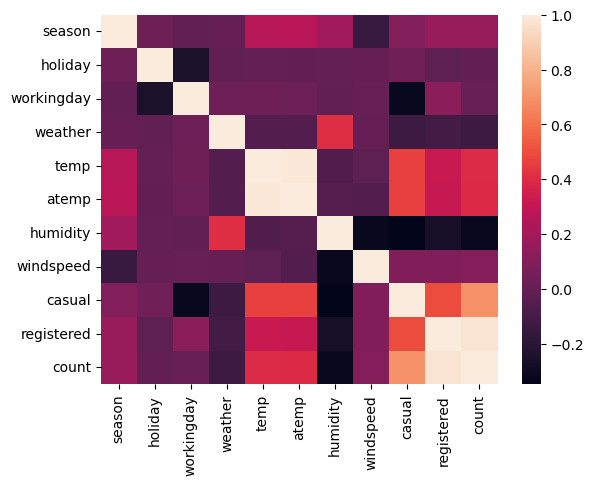

In [12]:
#check for correlation between the different features
sns.heatmap(df.corr())
#temp and atemp are highly correlated either one of the columns can be dropped from the dataframe
#similarly the registered and total count is highly correlated.we can drop either of them from the dataframe

In [13]:
df=df.drop(columns='atemp')
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1


In [14]:
#extract date from the datetime column and It will help to aggregate the data at day level
from datetime import datetime
df['date']=df['datetime'].dt.strftime('%Y-%m-%d')
df.head(3)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,2011-01-01


In [16]:
#To check seasonality in the customers number based on the month of the year
df['year_month']=df['datetime'].dt.strftime('%Y-%m')
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,date,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,2011-01-01,2011-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,2011-01-01,2011-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,2011-01-01,2011-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13,2011-01-01,2011-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1,2011-01-01,2011-01


In [19]:
#aggregate the data at day level and look at the number of customers on each day.
agg_dict={'season':'max', 'holiday':'max', 'workingday':'max', 'weather':'median', 'temp':'mean', 'casual':'sum', 'registered':'sum', 'count':'sum'}
df1=df.groupby('date').agg(agg_dict).reset_index()
df1.head(2)

,date,season,holiday,workingday,weather,temp,casual,registered,count
0,2011-01-01,1,0,0,1.5,14.110833,331,654,985
1,2011-01-02,1,0,0,2.0,14.902609,131,670,801


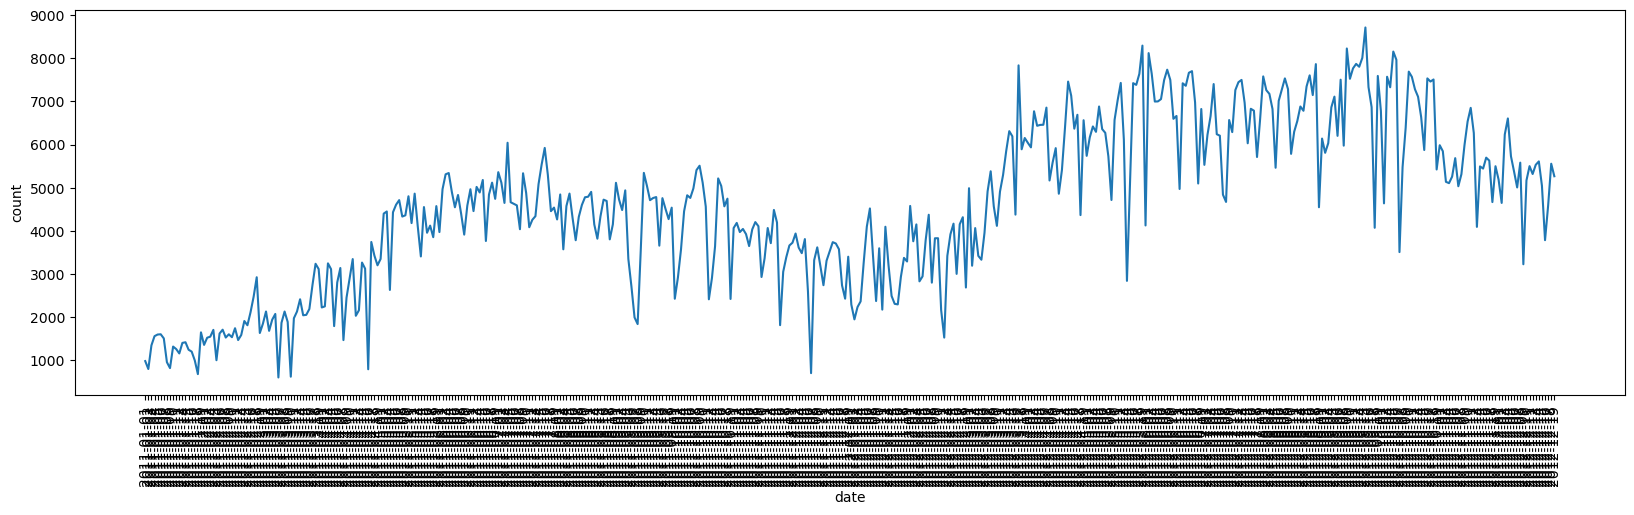

In [24]:
#check number of customers on each day based on date
df1=df1.sort_values('date')
plt.figure(figsize=(20,5))
sns.lineplot(data=df1,x='date',y='count')
plt.xticks(rotation=90)
plt.show()

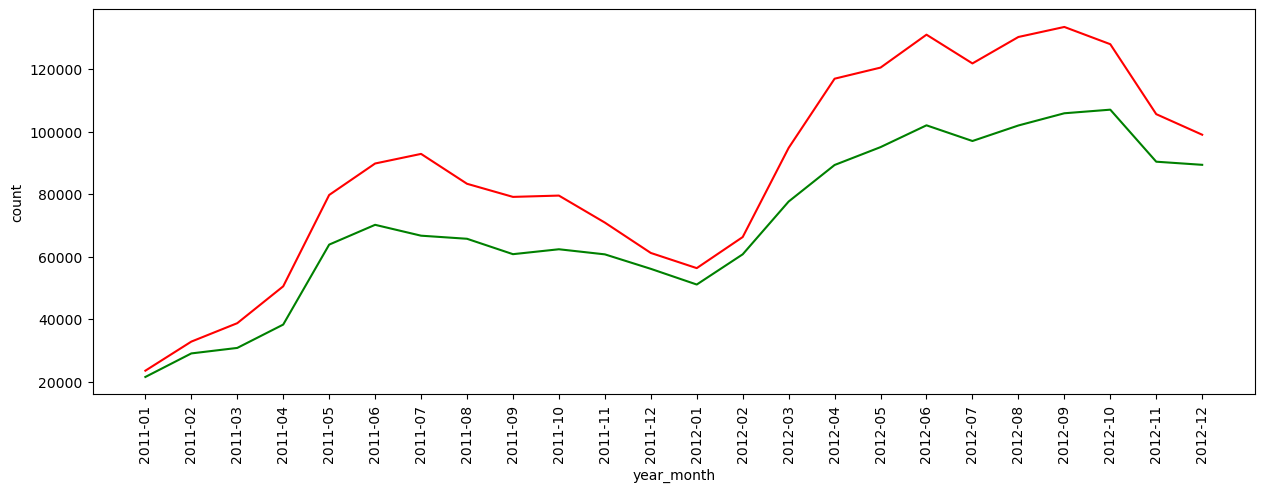

In [27]:
agg_dict={'season':'max', 'holiday':'max', 'workingday':'max', 'weather':'median', 'temp':'mean', 'casual':'sum', 'registered':'sum', 'count':'sum'}
df1=df.groupby('year_month').agg(agg_dict).reset_index()
df1=df1.sort_values('year_month')
plt.figure(figsize=(15,5))
sns.lineplot(data=df1,x='year_month',y='count',color='red')
sns.lineplot(data=df1,x='year_month',y='registered',color='green')
plt.xticks(rotation=90)
plt.show()

In [31]:
#check any relation between day of the week  and number of customers.
#check relationship between time of the day and number of customers.
df['day_week']=df['datetime'].dt.day_name()
df['time']=df['datetime'].dt.hour

In [32]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,date,year_month,day_week,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,2011-01-01,2011-01,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,2011-01-01,2011-01,Saturday,1


<AxesSubplot:xlabel='time', ylabel='value'>

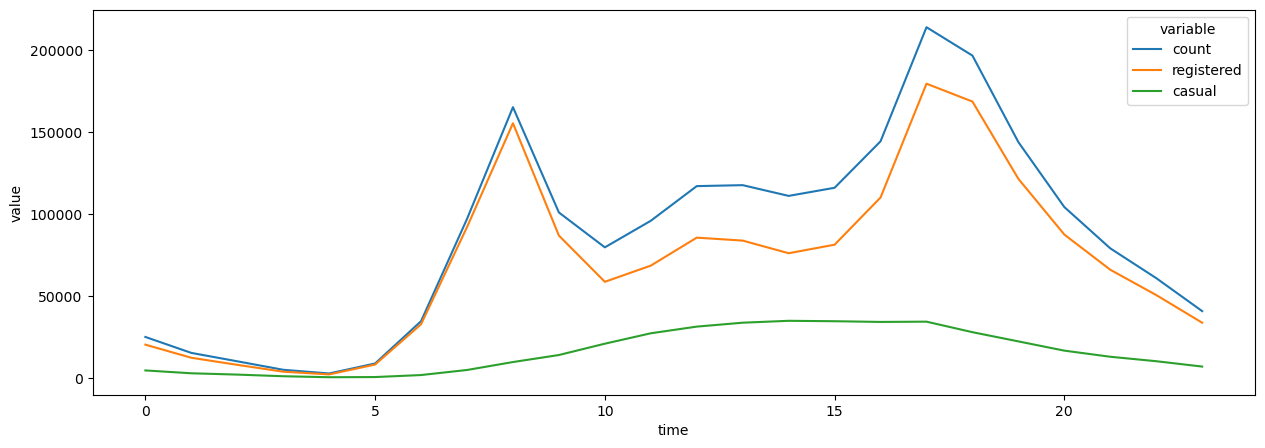

In [48]:
df1=df.groupby('time').agg(agg_dict).reset_index()
df1=df1.sort_values('time')
df1=pd.melt(df1,id_vars='time',value_vars=['count','registered','casual'])
plt.figure(figsize=(15,5))
sns.lineplot(data=df1,x='time',y='value',hue='variable')


<AxesSubplot:xlabel='day_week', ylabel='value'>

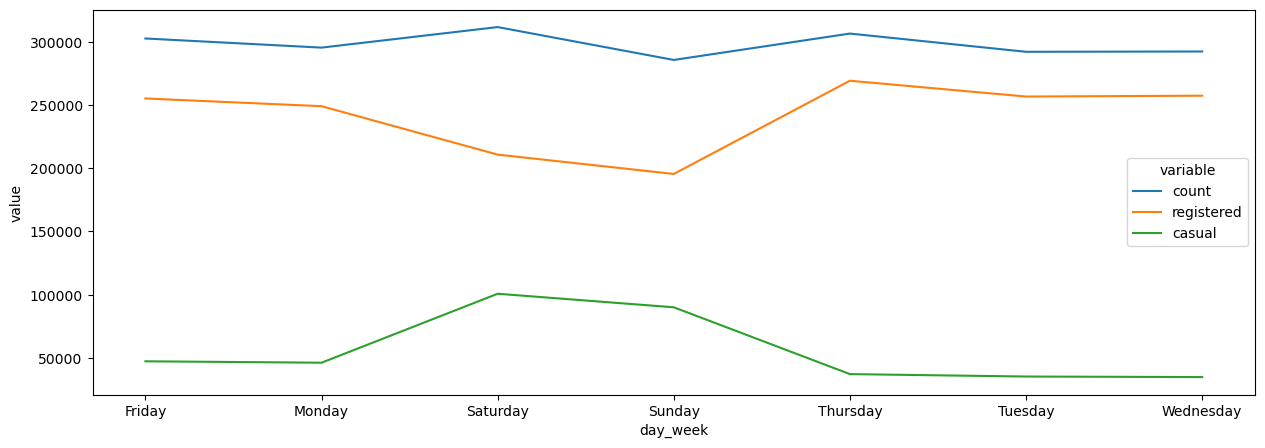

In [49]:
df1=df.groupby('day_week').agg(agg_dict).reset_index()
df1=df1.sort_values('day_week')
df1=pd.melt(df1,id_vars='day_week',value_vars=['count','registered','casual'])
plt.figure(figsize=(15,5))
sns.lineplot(data=df1,x='day_week',y='value',hue='variable')

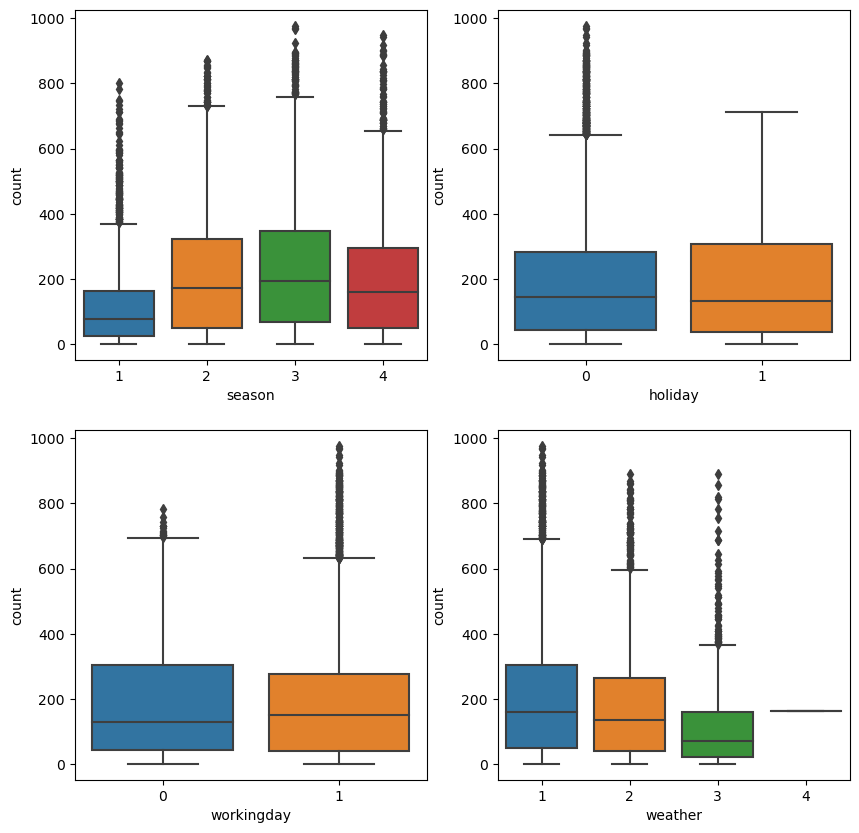

In [109]:
plt.figure(figsize=(10,10))
n=1
for i in ['season','holiday','workingday','weather']:
    plt.subplot(2,2,n)
    n+=1
    sns.boxplot(data=df,y='count',x=i)

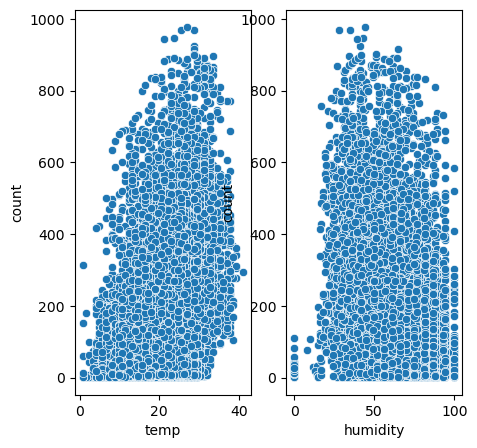

In [115]:
plt.figure(figsize=(5,5))
n=1
for i in ['temp','humidity']:
    plt.subplot(1,2,n)
    n+=1
    sns.scatterplot(data=df,y='count',x=i)
#no pattern can be obsorved from these scatterplot
    

### Observations
#### 1.There is a relationship between number of customers and month of the year.
#### 2.The number of customers steeply increase between jan and june,Later from July the number of customers decrease till december.
#### 3.highest number of customers are in the month of june,july and august.
#### 4.The demand for the yulu services peaks at 8 in the morning and 5'o clock in the evening.
#### 5.The total number of customers reachs peak on saturday and sunday.But,there is a significant decrease in the registered customers on these days.Other hand the number of casual customers increase on weekends.
#### 6.Customers prefer 1: Clear, Few clouds, partly cloudy, partly cloudy,2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist,3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds for riding the yulu bikes.
#### 7.Customers prefer summer and fall for riding yulu.The count of users decreases during spring season.
#### 8.Count of users is slightly higher  during working days, when compared to non working days.We can prove that using ttest independent.

In [52]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,date,year_month,day_week,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,2011-01-01,2011-01,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,2011-01-01,2011-01,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,2011-01-01,2011-01,Saturday,2


# statistical tests 

In [62]:
#check whether the holidays have impact on the number of bookings
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

Text(0.5, 0, 'No_of_Users')

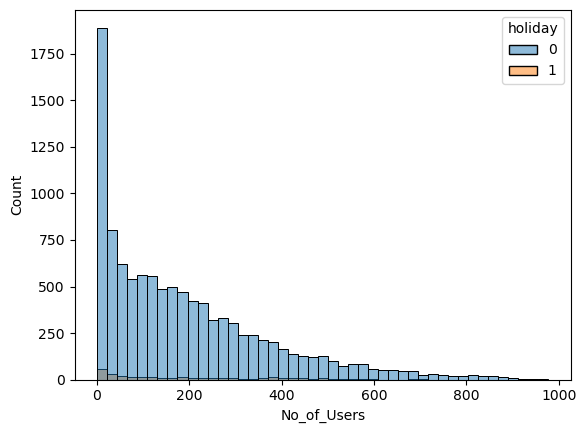

In [64]:
sns.histplot(data=df,x='count',hue='holiday')
plt.xlabel('No_of_Users')
##the distribution is not normal 
#lets aggregate the data on day level and look at the distribution

Text(0.5, 0, 'No_of_daily_users')

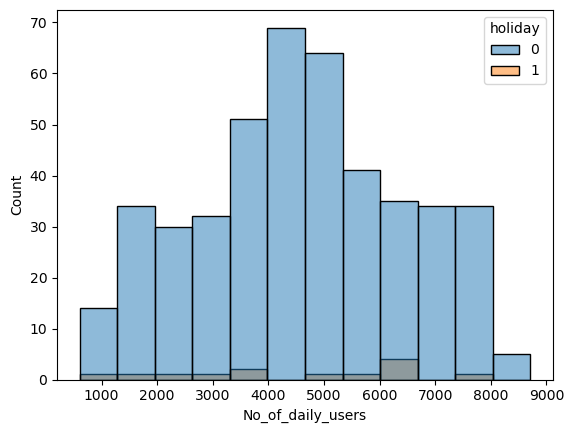

In [69]:
df1=df.groupby(by=['date','holiday'])['count'].sum().reset_index()
sns.histplot(data=df1,x='count',hue='holiday')
plt.xlabel('No_of_daily_users')
##the aggregated data is normally distributed.
#lets perform ttest independence on these variables

In [77]:
holiday=df1[df1['holiday']==1]['count']
non_holiday=df1[df1['holiday']==0]['count']
from scipy.stats import ttest_ind

In [78]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [83]:
#since the number of holidays and non_holidays are not equal,the data is highly hihgly skewed towards non holiday.we can use sampling technique
holiday=df[df['holiday']==1]['count'].sample(311)
non_holiday=df[df['holiday']==0]['count'].sample(311)

### Null Hypothesis: The Average number of user is same on holiday and non holiday
### Alternative Hypothesis:The average number of users is higher on holidays


In [86]:
statistic,pvalue=ttest_ind(holiday,non_holiday,alternative='greater')
#Lets assume significance level as 0.05
print('pvalue :',pvalue)
if pvalue>0.05:
    print('Fail to reject Null hypothesis')
else:
    print('Reject Null Hypothesis:Number of users on holidays are more than non holidays')

pvalue : 0.734746944843941
Fail to reject Null hypothesis


### Null Hypothesis: The Average number of user is same on working and non working days
### Alternative Hypothesis:The average number of users is higher on workingday

In [90]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [91]:
working=df[df['workingday']==1]['count'].sample(3474)
non_working=df[df['workingday']==0]['count'].sample(3474)

In [93]:
statistic,pvalue=ttest_ind(working,non_working,alternative='greater')
#Lets assume significance level as 0.05
print('pvalue :',pvalue)
if pvalue>0.05:
    print('Fail to reject Null hypothesis:Average number of users same for working and non working days')
else:
    print('Reject Null Hypothesis:Number of users on workingdays are more than non workingdays')

pvalue : 0.3426233751338935
Fail to reject Null hypothesis:Average number of users same for working and non working days


# ANOVA test 

## Check impact of seasons on number of users

In [97]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

Text(0.5, 0, 'No_of_Users')

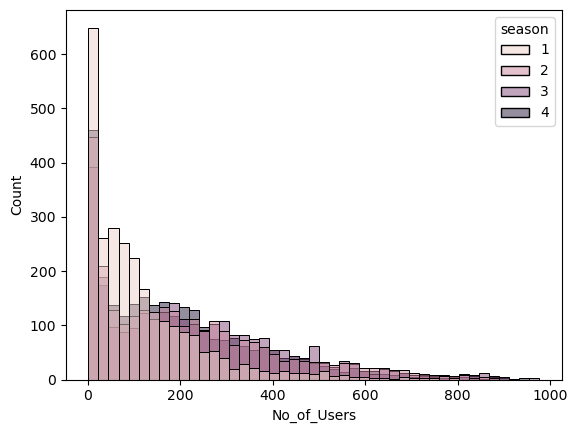

In [101]:
#lets have a basic visualisation on number of customers across different seasons
sns.histplot(data=df,x='count',hue='season')
plt.xlabel('No_of_Users')
#Number of users in these seasons are normally distributed .It fails the first assumption of the anova test

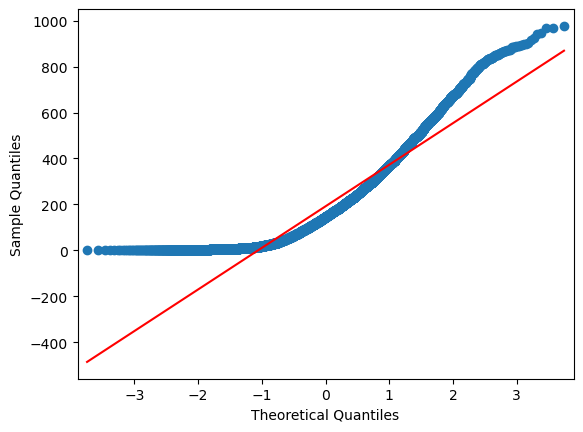

In [104]:
from statsmodels.api import qqplot
qqplot(df['count'], line = 's')
plt.show()
##The plot will be of straight line if the data is normally distributed.
#But,here the plot is bending.This indicates the non normality of the data.

<AxesSubplot:xlabel='season', ylabel='count'>

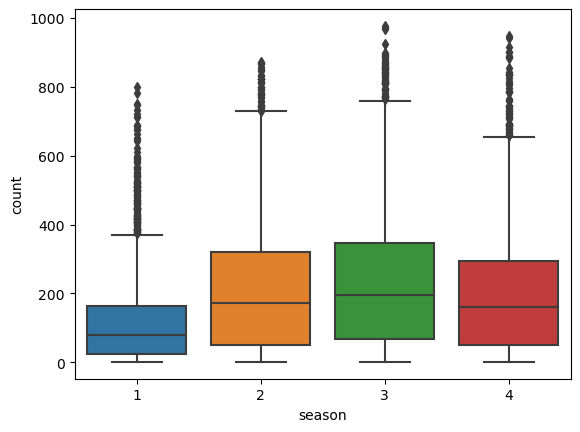

In [102]:
#check the variance over number of users for each seasons
sns.boxplot(data=df,y='count',x='season')
#It appearce to be a significant difference in variance across different seasons.
#lets compare the variance across seasons by using levene test.

In [105]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind
from scipy.stats import f_oneway
from scipy.stats import shapiro # normality test
from scipy.stats import levene # test for equal variance
from scipy.stats import kruskal # if assumptions of anova are not met

from scipy.stats import chi2, chisquare, chi2_contingency
from scipy.stats import pearsonr, spearmanr #correlation

from statsmodels.graphics.gofplots import qqplot

## Levene test -Check variance

## Null hypothesis:Variance is same across the seasons wrt number of users
## Alternative Hypothesis: Variance is not same

In [107]:
s1 = df[df['season']==1]['count']
s2 = df[df['season']==2]['count']
s3 = df[df['season']==3]['count']
s4 = df[df['season']==4]['count']
statistic,pvalue=levene(s1,s2,s3,s4)
print('Pvalue :',pvalue)
if pvalue>0.05:
    print('Fail to reject Null hypothesis:variance wrt number of users is same across different seasons')
else:
    print('Reject Null Hypothesis:variance of Number of users is different across different seasons')

Pvalue : 1.0147116860043298e-118
Reject Null Hypothesis:variance of Number of users is different across different seasons


**Simce the assumptions for ANOVA are not met --> Krukal Wallis**

In [116]:
# H0: Avg booking is the same across all seasons
# H1: Avg bookings are diffent across various seasons

kruskal(s1, s2,s3,s4)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

- alpha = 0.05
- p is low, null will go
- since p value is less tha alpha, we reject null
- Avg booking acorss various seasons are different

## Is there dependency between Weather and Season

- HO: Weather and season are independent
- H1: Weather and season are dependent

In [117]:
ct = pd.crosstab(df['weather'], df['season'])

In [118]:
chi2_contingency(ct)

(49.15865559689363,
 1.5499250736864862e-07,
 9,
 array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
        [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
        [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
        [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

- alpha = 0.05
- p value is low, null will go
- Since p value is less than alpha, we reject null
- They are dependent

## Recommendations:
- 1.Demand for the yulu services is higher on weekends.Try to keep sufficient number of vehicles to satisfy the demand.
- 2.Demand is high in summer and fall seasons.Fill the stocks during these seasons.Keep repair works during spring when the demand for the vehicles is lower.
- 3.The demand peaks during 9 am and 5pm.Try to increase the serverspeed during this timeperiod to avoid booking failures.
- 4.The number of registered customers are higher during the weekdays.On,other hand the number of casual users increases on the weekends.Weekends are the best time to onboard the new customers.
- 5.Demand is higher during working days and less during non working days.This will indicates that the most of our customers are working professionals.We can increase the customer base by targetting working professionals.
- 6.The customers tend to not choose yulu's services during harsh weather conditions.We can work on the vehicle design which is favourable for riding even during harsh weather conditions.This would increase the customers in future.